In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from MHW_daily_calcs import *

In [2]:
climyrs=[1993,2023]
windowhalfwid=10
smoothmethod='tri'
jj=60
iy1,ix1=(55,200)
iy2,ix2=(1,200)

### Climatologies

In [3]:
cIndiv=xr.open_dataset(fnameOISSTDailyClim(climyrs[0],climyrs[-1]))
cSmooth=xr.open_dataset(fnameOISSTDailyClimSmooth(climyrs[0],climyrs[-1],smoothmethod,windowhalfwid))

In [4]:
cIndiv

<xarray.Dataset> Size: 189MB
Dimensions:  (yearday: 365, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * yearday  (yearday) int64 3kB 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Data variables:
    sst      (yearday, lat, lon) float64 189MB ...

(0.5, 366.5)

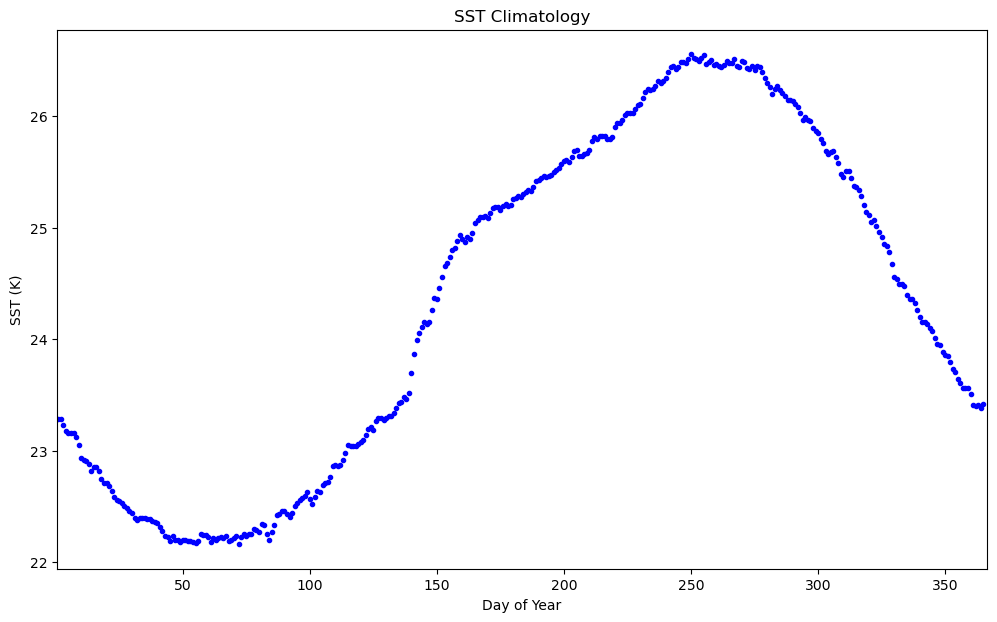

In [5]:
#clim only
fig,ax=plt.subplots(1,1,figsize=(12,7))
t=np.arange(1,366)
plt.plot(t,cIndiv.sst.isel(lat=jj+iy1,lon=ix1).values,'b.')
ax.set_title('SST Climatology')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')
ax.set_xlim(.5,366.5)

(0.5, 366.5)

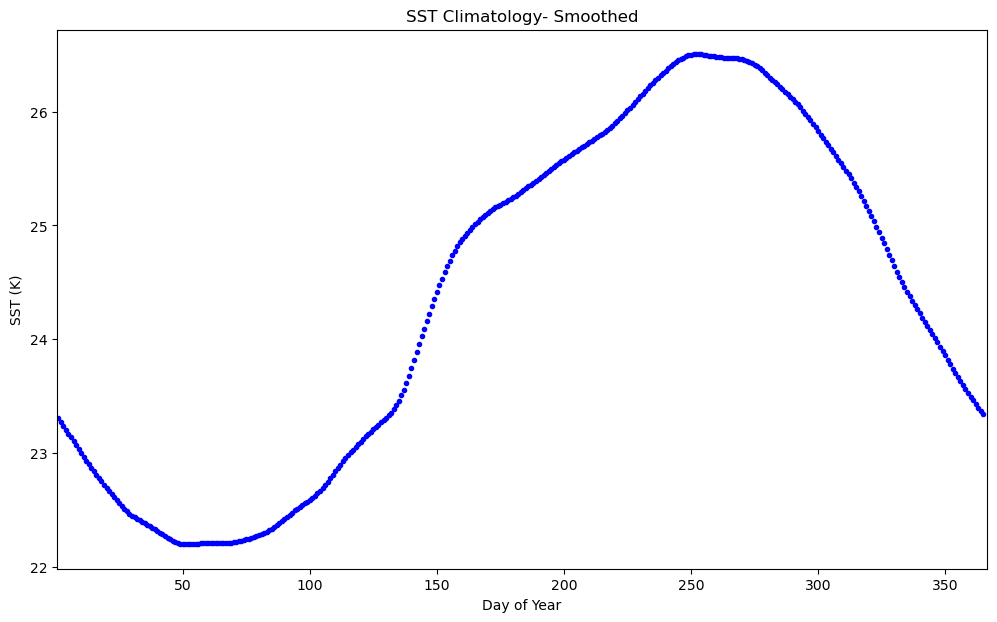

In [6]:
#clim only
fig,ax=plt.subplots(1,1,figsize=(12,7))
t=np.arange(1,366)
plt.plot(t,cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values,'b.')
ax.set_title('SST Climatology- Smoothed')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')
ax.set_xlim(.5,366.5)

### Anomalies

In [7]:
flist=[fnameOISSTAnom(yrlims, climyrs, jj, True, smoothmethod, windowhalfwid) for yrlims in ylimlistobs]
flist

['/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.1991_2000_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2001_2010_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2011_2020_j60.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/OISST/oisst_anom_ClimStri10_C1993_2023-avhrr-v02r01.regridded1x1g2.daily.2021_2024_j60.nc']

In [8]:
fanom=xr.open_mfdataset(flist,decode_times=False,parallel=True)

In [9]:
fanomD=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, True, smoothmethod, windowhalfwid),])

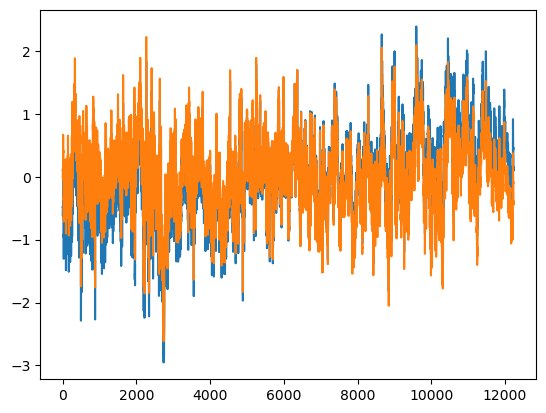

In [10]:
plt.plot(fanom.sst_an[:,iy1,ix1])
plt.plot(fanomD.sst_an[:,iy1,ix1])

In [11]:
fanom.close()
fanomD.close()

### Quantiles

In [12]:
fqp=fnameOISSTQTile(climyrs, jj, qtile)
fqd5p=fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=smoothmethod, win=windowhalfwid,detr=True,delt=5)
fqd10p = fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=smoothmethod, win=windowhalfwid,detr=True,delt=10)
fqd15p = fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=smoothmethod, win=windowhalfwid,detr=True,delt=15)
fqd30p = fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=smoothmethod, win=windowhalfwid,detr=True,delt=30)

In [13]:
fq=xr.open_dataset(fqp)
fqd5=xr.open_dataset(fqd5p)
fqd10=xr.open_dataset(fqd10p)
fqd15=xr.open_dataset(fqd15p)
fqd30=xr.open_dataset(fqd30p)

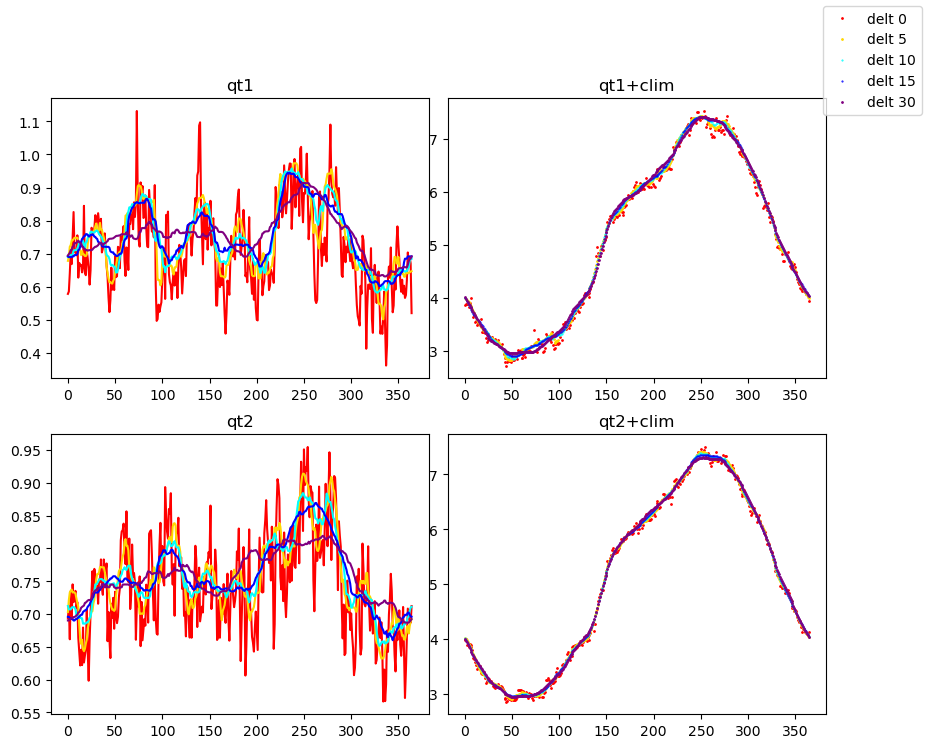

In [14]:
fig,ax=plt.subplots(2,2,figsize=(10,8),gridspec_kw={'hspace':.2,'wspace':.05})
ax[0,0].plot(fq.qt1[:,iy1,ix1],'-',color='r')
ax[1,0].plot(fq.qt2[:,iy1,ix1],'-',color='r')
ax[0,1].plot(cIndiv.sst.isel(lat=jj+iy1,lon=ix1).values+fq.qt1[:,iy1,ix1]-20,'.',color='r',ms=2,label='delt 0')
ax[1,1].plot(cIndiv.sst.isel(lat=jj+iy1,lon=ix1).values+fq.qt2[:,iy1,ix1]-20,'.',color='r',ms=2)

ax[0,0].plot(fqd5.qt1[:,iy1,ix1],'-',color='gold')
ax[1,0].plot(fqd5.qt2[:,iy1,ix1],'-',color='gold')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd5.qt1[:,iy1,ix1]-20,'.',color='gold',ms=2,label='delt 5')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd5.qt2[:,iy1,ix1]-20,'.',color='gold',ms=2)

ax[0,0].plot(fqd10.qt1[:,iy1,ix1],'-',color='cyan')
ax[1,0].plot(fqd10.qt2[:,iy1,ix1],'-',color='cyan')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd10.qt1[:,iy1,ix1]-20,'.',color='cyan',ms=1,label='delt 10')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd10.qt2[:,iy1,ix1]-20,'.',color='cyan',ms=1)

ax[0,0].plot(fqd15.qt1[:,iy1,ix1],'-',color='blue')
ax[1,0].plot(fqd15.qt2[:,iy1,ix1],'-',color='blue')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd15.qt1[:,iy1,ix1]-20,'.',color='blue',ms=1,label='delt 15')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd15.qt2[:,iy1,ix1]-20,'.',color='blue',ms=1)

ax[0,0].plot(fqd30.qt1[:,iy1,ix1],'-',color='purple')
ax[1,0].plot(fqd30.qt2[:,iy1,ix1],'-',color='purple')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd30.qt1[:,iy1,ix1]-20,'.',color='purple',ms=2,label='delt 30')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd30.qt2[:,iy1,ix1]-20,'.',color='purple',ms=2)

ax[0,0].set_title('qt1')
ax[1,0].set_title('qt2')
ax[0,1].set_title('qt1+clim')
ax[1,1].set_title('qt2+clim')
fig.legend()

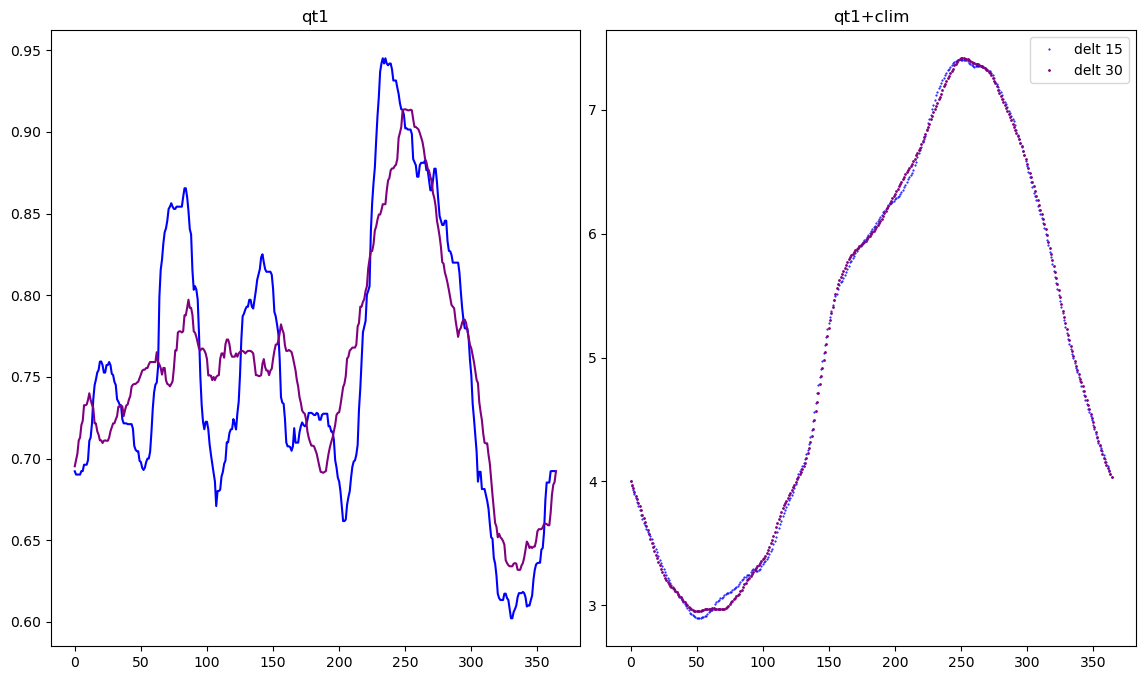

In [20]:
fig,ax=plt.subplots(1,2,figsize=(14,8),gridspec_kw={'hspace':.2,'wspace':.05})

ax[0].plot(fqd15.qt1[:,iy1,ix1],'-',color='blue')
ax[1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd15.qt1[:,iy1,ix1]-20,'.',color='blue',ms=1,label='delt 15')
ax[0].plot(fqd30.qt1[:,iy1,ix1],'-',color='purple')
ax[1].plot(cSmooth.sst.isel(lat=jj+iy1,lon=ix1).values+fqd30.qt1[:,iy1,ix1]-20,'.',color='purple',ms=2,label='delt 30')

ax[0].set_title('qt1')
ax[1].set_title('qt1+clim')
ax[1].legend()

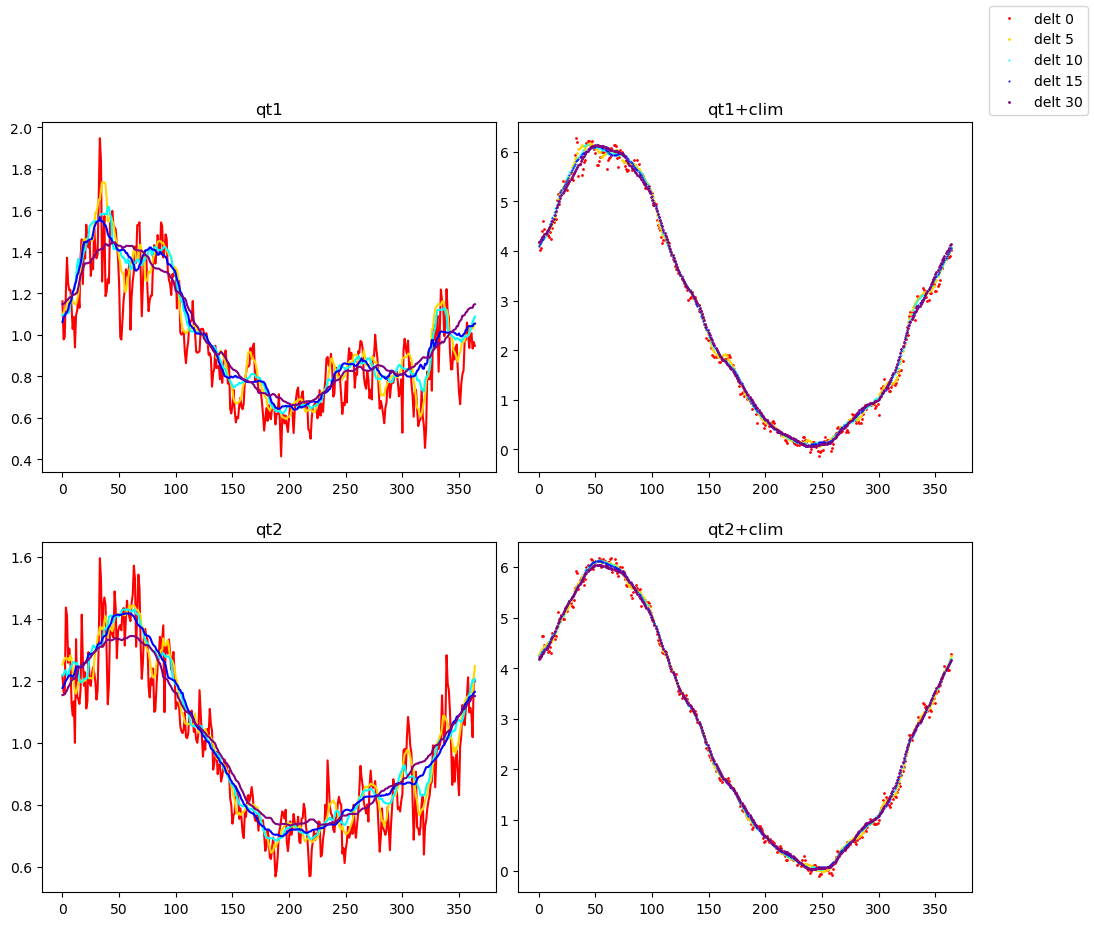

In [21]:
fig,ax=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'hspace':.2,'wspace':.05})
ax[0,0].plot(fq.qt1[:,iy2,ix2],'-',color='r')
ax[1,0].plot(fq.qt2[:,iy2,ix2],'-',color='r')
ax[0,1].plot(cIndiv.sst.isel(lat=jj+iy2,lon=ix2).values+fq.qt1[:,iy2,ix2]-20,'.',color='r',ms=2,label='delt 0')
ax[1,1].plot(cIndiv.sst.isel(lat=jj+iy2,lon=ix2).values+fq.qt2[:,iy2,ix2]-20,'.',color='r',ms=2)

ax[0,0].plot(fqd5.qt1[:,iy2,ix2],'-',color='gold')
ax[1,0].plot(fqd5.qt2[:,iy2,ix2],'-',color='gold')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd5.qt1[:,iy2,ix2]-20,'.',color='gold',ms=2,label='delt 5')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd5.qt2[:,iy2,ix2]-20,'.',color='gold',ms=2)

ax[0,0].plot(fqd10.qt1[:,iy2,ix2],'-',color='cyan')
ax[1,0].plot(fqd10.qt2[:,iy2,ix2],'-',color='cyan')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd10.qt1[:,iy2,ix2]-20,'.',color='cyan',ms=1,label='delt 10')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd10.qt2[:,iy2,ix2]-20,'.',color='cyan',ms=1)

ax[0,0].plot(fqd15.qt1[:,iy2,ix2],'-',color='blue')
ax[1,0].plot(fqd15.qt2[:,iy2,ix2],'-',color='blue')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd15.qt1[:,iy2,ix2]-20,'.',color='blue',ms=1,label='delt 15')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd15.qt2[:,iy2,ix2]-20,'.',color='blue',ms=1)

ax[0,0].plot(fqd30.qt1[:,iy2,ix2],'-',color='purple')
ax[1,0].plot(fqd30.qt2[:,iy2,ix2],'-',color='purple')
ax[0,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd30.qt1[:,iy2,ix2]-20,'.',color='purple',ms=2,label='delt 30')
ax[1,1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd30.qt2[:,iy2,ix2]-20,'.',color='purple',ms=2)

ax[0,0].set_title('qt1')
ax[1,0].set_title('qt2')
ax[0,1].set_title('qt1+clim')
ax[1,1].set_title('qt2+clim')
fig.legend()

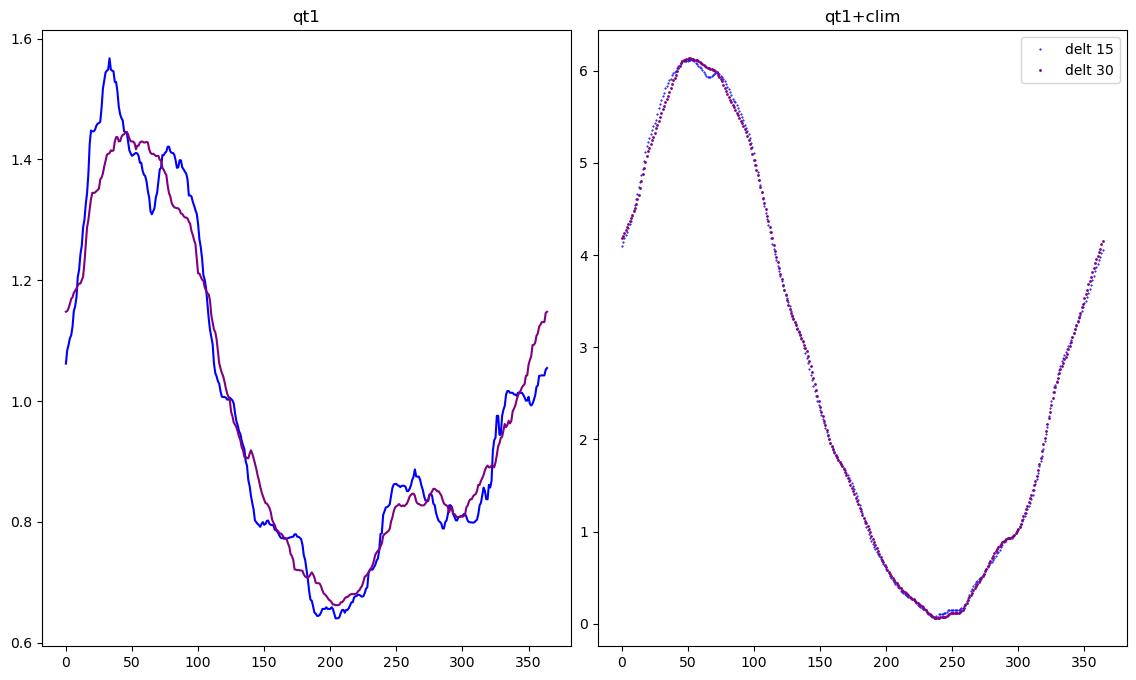

In [22]:
fig,ax=plt.subplots(1,2,figsize=(14,8),gridspec_kw={'hspace':.2,'wspace':.05})

ax[0].plot(fqd15.qt1[:,iy2,ix2],'-',color='blue')
ax[1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd15.qt1[:,iy2,ix2]-20,'.',color='blue',ms=1,label='delt 15')

ax[0].plot(fqd30.qt1[:,iy2,ix2],'-',color='purple')
ax[1].plot(cSmooth.sst.isel(lat=jj+iy2,lon=ix2).values+fqd30.qt1[:,iy2,ix2]-20,'.',color='purple',ms=2,label='delt 30')

ax[0].set_title('qt1')
ax[1].set_title('qt1+clim')
ax[1].legend()

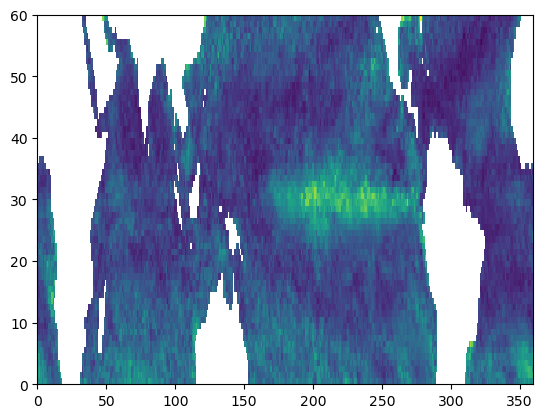

In [18]:
plt.pcolormesh(fq.qt1[0,:,:])

In [19]:
f3=xr.open_dataset(fnameCanESMAnomDetrQtile(workdir, climyrs[0], climyrs[-1], 5, jj, qtile, smoothClim=True,smoothTrend=True,
                                            meth=smoothmethod,win=windowhalfwid,delt=delt))

NameError: name 'fnameCanESMAnomDetrQtile' is not defined

In [ ]:
plt.plot(f3.qt1[:,1,200],'k.')

In [ ]:
x=True; y= False
if x and not y: print('yes')

In [ ]:
detr=True
pfile1=fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], 5, jj, qtile, detr,
                               smoothClim=True,smoothTrend=True,meth=smoothmethod,win=windowhalfwid,delt=10)
file1=xr.open_dataset(pfile1)
file1

In [ ]:
file1